In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('processed.cleveland.data',names=  ['age','sex','chest_pain','blood pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis'])

In [3]:
df

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
df.describe()

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    float64
 1   sex                   303 non-null    float64
 2   chest_pain            303 non-null    float64
 3   blood pressure        303 non-null    float64
 4   serum_cholestoral     303 non-null    float64
 5   fasting_blood_sugar   303 non-null    float64
 6   electrocardiographic  303 non-null    float64
 7   max_heart_rate        303 non-null    float64
 8   induced_angina        303 non-null    float64
 9   ST_depression         303 non-null    float64
 10  slope                 303 non-null    float64
 11  vessels               303 non-null    object 
 12  thal                  303 non-null    object 
 13  diagnosis             303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
# checking for null
df.isna().sum()

age                     0
sex                     0
chest_pain              0
blood pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
vessels                 0
thal                    0
diagnosis               0
dtype: int64

In [7]:
## vessel and thal variables have some missing values shown as '?'
(df == '?').sum()

age                     0
sex                     0
chest_pain              0
blood pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
vessels                 4
thal                    2
diagnosis               0
dtype: int64

In [8]:
df['vessels'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: vessels, dtype: int64

In [9]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [10]:
## removing the '?' misssing values

In [11]:
df[df['vessels'] == '?']['vessels']

166    ?
192    ?
287    ?
302    ?
Name: vessels, dtype: object

In [12]:
df[df['thal'] == '?']['thal']

87     ?
266    ?
Name: thal, dtype: object

In [13]:
missing_vessels = df[df['vessels'] == '?']['vessels'].index
missing_thals = df[df['thal'] == '?']['thal'].index

In [14]:
df.drop(missing_vessels,inplace=True)
df.drop(missing_thals,inplace=True)

In [15]:
## After removing 6 missing values
df

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



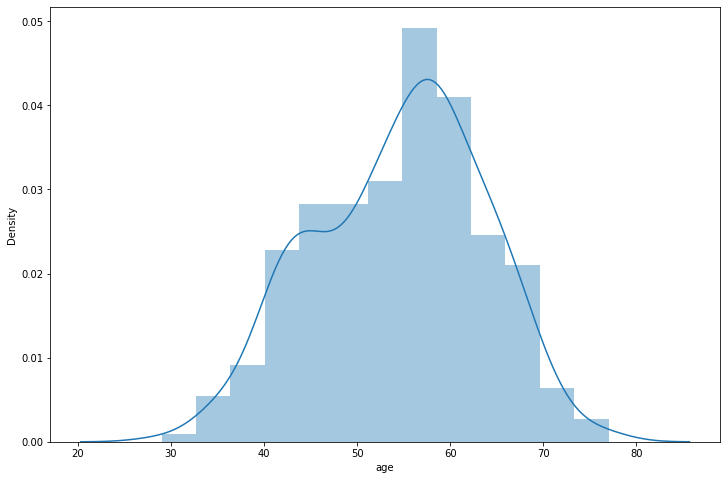

In [16]:
## Checking for age distribution
plt.figure(figsize=(12,8))
sns.distplot(df['age'])

In [17]:
### age range of people with their gender 1: Male 0: Female
plt.figure(figsize=(10,6))
px.histogram(df,'age',color='sex')

<Figure size 720x432 with 0 Axes>

In [18]:
### Target distribution 
df['diagnosis'].value_counts()

0    160
1     54
3     35
2     35
4     13
Name: diagnosis, dtype: int64

In [19]:
# ''' As given in the Dataset :The "goal" field refers to the presence of heart disease
#      in the patient.  It is integer valued from 0 (no presence) to 4.
#      Experiments with the Cleveland database have concentrated on simply
#      attempting to distinguish presence (values 1,2,3,4) from absence (value
#      0).  '''

In [20]:
df['Target'] = df['diagnosis'].apply(lambda x : 1 if x >= 1 else 0)

In [21]:
df

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis,Target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1


In [22]:
#### Distribution of Diagnosis to sex
plt.figure(figsize=(10,6))
px.histogram(df,x='diagnosis',color='sex',barmode="group")

<Figure size 720x432 with 0 Axes>

In [23]:
### Finding correlation of variables
df.corr()

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,diagnosis,Target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.222156,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.226797,0.278467
chest_pain,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.404248,0.408945
blood pressure,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.159620,0.153490
serum_cholestoral,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.066448,0.080285
fasting_blood_sugar,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.049040,0.003167
electrocardiographic,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.184136,0.166343
max_heart_rate,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.420639,-0.423817
induced_angina,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.391613,0.421355
ST_depression,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.501461,0.424052


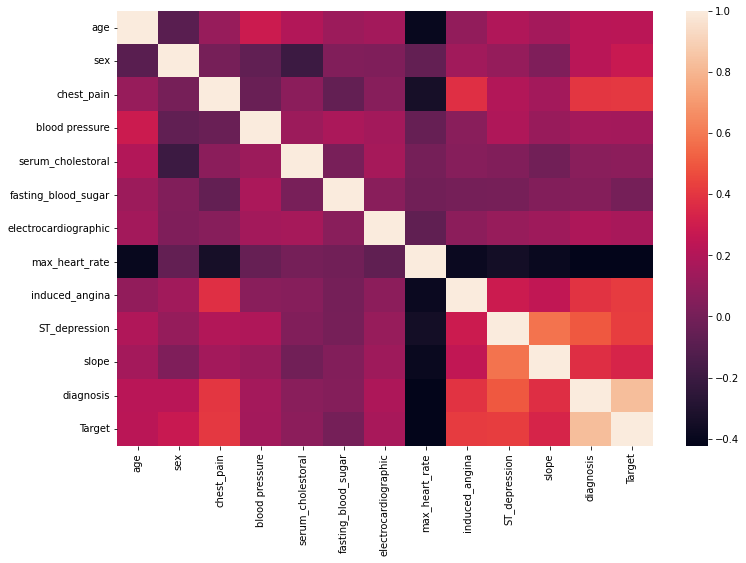

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [25]:
df['diagnosis']

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: diagnosis, Length: 297, dtype: int64

In [26]:
### Train test split

In [27]:
X= df.drop(['diagnosis','Target'],axis=1)
y = df['Target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
## Model Classification

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
### Taking average of 10 training examples
dt_avg = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf1 = DecisionTreeClassifier()
    dt_model = clf1.fit(X_train,y_train)
    dt_pred = dt_model.predict(X_test)
    dt_avg.append(accuracy_score(y_test,dt_pred))
    
print('Average Decision Tree Test accuracy:',sum(dt_avg)/10)

Average Decision Tree Test accuracy: 0.7333333333333334


In [32]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,log_loss
print(classification_report(y_test,dt_pred))

print(confusion_matrix(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        36
           1       0.64      0.67      0.65        24

    accuracy                           0.72        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60

[[27  9]
 [ 8 16]]


In [34]:
print('Log loss for Decision Tree model:',log_loss(y_test,dt_pred))

Log loss for Decision Tree model: 8.059114458598343
